In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df=pd.read_csv('NYPD_Arrests_Data__Historic__20231223.csv')

# How do the number of arrests charged as felonies from the 90th Precinct compare to other precincts in Brooklyn? 

I decided to do an analysis on the 90th precinct, near me, compared to other precincts in Brooklyn to see which areas in Brooklyn have a higher number of arrests charged as felonies. Crimes charged as felonies are more serious offenses versus misdemeanors and violations. This analysis will help get an idea of which areas in Brooklyn have a higher crime rate. 

In [100]:
#Overview of first 5 rows of the dataset
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


In [101]:
#Overview of last 5 rows of the dataset
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
5498645,255851599,12/13/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,32,0.0,25-44,M,BLACK,1000188.0,238820.0,40.822167,-73.942415,POINT (-73.94241483 40.82216691)
5498646,256469262,12/16/2022,198.0,CRIMINAL CONTEMPT 1,126.0,MISCELLANEOUS PENAL LAW,PL 21551B3,F,B,46,0.0,25-44,M,BLACK,1011750.0,250274.0,40.853578,-73.900591,POINT (-73.900591 40.853578)
5498647,260305039,12/20/2022,548.0,"GAMBLING, DEVICE, POSSESSION",350.0,GAMBLING,PL 2253001,M,K,72,0.0,25-44,F,ASIAN / PACIFIC ISLANDER,981944.0,171869.0,40.638420,-74.008307,POINT (-74.008307 40.63842)
5498648,255843041,12/13/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,5,0.0,45-64,M,ASIAN / PACIFIC ISLANDER,986159.0,200104.0,40.715917,-73.993111,POINT (-73.993111 40.715917)
5498649,261085179,12/29/2022,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,B,40,0.0,25-44,F,BLACK,1006718.0,233117.0,40.806500,-73.918838,POINT (-73.918838 40.8065)


In [102]:
#Values for PD_DESC column
df['PD_DESC'].unique()

array([nan, 'RAPE 3', 'CHILD, ENDANGERING WELFARE',
       'CONTROLLED SUBSTANCE, POSSESSION 7', 'SEXUAL ABUSE',
       'ARSON 2,3,4', 'FORGERY,ETC.,UNCLASSIFIED-FELO', 'ASSAULT 3',
       'STRANGULATION 1ST', 'RAPE 1', 'TRESPASS 3, CRIMINAL',
       'FACILITATION 4, CRIMINAL', 'ROBBERY,OPEN AREA UNCLASSIFIED',
       'SEXUAL ABUSE 3,2', 'PROSTITUTION', 'SEXUAL ABUSE 1', 'SODOMY 1',
       'WEAPONS POSSESSION 3', 'RIOT 1', 'MARIJUANA, POSSESSION 1, 2 & 3',
       'SODOMY 2', 'MARIJUANA, SALE 4 & 5', 'RAPE 2',
       'IMPERSONATION 2, PUBLIC SERVANT',
       'CONTROLLED SUBSTANCE,INTENT TO', 'ASSAULT 2,1,UNCLASSIFIED',
       'SODOMY 3', 'STOLEN PROPERTY 3,POSSESSION',
       'RECKLESS ENDANGERMENT 1', 'FORGERY,ETC.,UNCLASSIFIED-FELONY',
       'LARCENY,PETIT FROM OPEN AREAS,', 'MARIJUANA, POSSESSION 4 & 5',
       'BURGLARY,RESIDENCE,NIGHT', 'WEAPONS POSSESSION 1 & 2',
       'TRESPASS 2, CRIMINAL', 'ROBBERY,UNCLASSIFIED,OPEN AREAS',
       'FORGERY,ETC.-MISD.', 'WEAPONS, POSSESSION, E

In [103]:
#Values for OFNS_DESC column
df['OFNS_DESC'].unique()

array([nan, 'RAPE', 'SEX CRIMES', 'DANGEROUS DRUGS', 'ARSON', 'FORGERY',
       'ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
       'CRIMINAL TRESPASS', 'ANTICIPATORY OFFENSES', 'ROBBERY',
       'PROSTITUTION & RELATED OFFENSES', 'DANGEROUS WEAPONS',
       'MISCELLANEOUS PENAL LAW', 'FRAUDS',
       'POSSESSION OF STOLEN PROPERTY 5', 'PETIT LARCENY', 'BURGLARY',
       'FORCIBLE TOUCHING', 'OFFENSES INVOLVING FRAUD', 'THEFT-FRAUD',
       'OTHER STATE LAWS', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'F.C.A. P.I.N.O.S.', 'OFFENSES AGAINST THE PERSON',
       'OFFENSES AGAINST PUBLIC ADMINI',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'VEHICLE AND TRAFFIC LAWS', 'JOSTLING',
       'OTHER OFFENSES RELATED TO THEFT', 'DISORDERLY CONDUCT',
       'GRAND LARCENY', 'OTHER TRAFFIC INFRACTION',
       'POSSESSION OF STOLEN PROPERTY', 'CRIMINAL MISCHIEF & RELATED OF',
       'FOR OTHER AUTHORITIES', 'INTOXICATED & IMPAIRED DRIVING',
       'ALCOHOLIC BEVERAGE CONT

In [104]:
#Values for AGE_GROUP column
df['AGE_GROUP'].unique()

array(['45-64', '25-44', '18-24', '<18', '65+', nan, '929', '944', '945',
       '320', '932', '894', '935', '934', '940', '339', '323', '965',
       '948', '946', 'UNKNOWN', '938', '895', '194', '928', '352', '943',
       '956', '920', '951', '708', '816', '316', '912', '237', '939',
       '947', '740', '952', '949', '338', '922', '933', '921', '1042',
       '2000', '1937', '1916', '1928', '2007', '1918', '1947', '1998',
       '1953', '1942', '1024', '1948', '937', '1922', '1048', '1018',
       '918', '927', '926', '931', '942', '924', '941', '930', '955',
       '936', '808', '812', '317', '909', '923', '914', '231', '896',
       '709', '640', '925', '212', '200', '954', '314', '723', '309',
       '959', '910', '446', '330'], dtype=object)

In [105]:
#Values for PERP_RACE column
df['PERP_RACE'].unique()

array(['BLACK', 'WHITE HISPANIC', 'UNKNOWN', 'WHITE', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE',
       'OTHER'], dtype=object)

In [106]:
#Values for PERP_SEX column
df['PERP_SEX'].unique()

array(['M', 'F'], dtype=object)

In [107]:
#Values for ARREST_PRECINCT column
df['ARREST_PRECINCT'].unique()

array([ 28,  41, 113,  27,  25,  14, 115,  67,  83,  23,  30,  77,  75,
       112,   1,   5,  43,  46,   6,  50,  26,  18,  84,  72, 114, 121,
       103,  63,  68,  71, 120, 108, 109,  60,  32,   7,  44,  13,  45,
        61, 101,  79,  52,  90,  40,   9, 105,  20,  10, 106,  48, 102,
        19,  69,  42,  17,  49,  62,  73,  78,  70,  47, 104,  24, 100,
        34,  81, 122, 110, 107,  33,  76,  88,  66, 123,  94, 111,  22])

Simple count (statistics) of dataset

In [108]:
#Count of arrests in each borough
df.groupby(['ARREST_BORO'])['ARREST_BORO'].count().sort_values(ascending=False)

ARREST_BORO
K    1523971
M    1477440
B    1257008
Q    1043049
S     197174
Name: ARREST_BORO, dtype: int64

In [109]:
#Count of arrests in each precinct
df.groupby(['ARREST_PRECINCT'])['ARREST_PRECINCT'].count().sort_values(ascending=False)

ARREST_PRECINCT
14     190759
75     186005
44     175305
40     161679
73     147713
        ...  
94      24889
111     24615
123     21907
22       6717
27          1
Name: ARREST_PRECINCT, Length: 78, dtype: int64

In [110]:
#Count of each gender
df.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

PERP_SEX
M    4573998
F     924652
Name: PERP_SEX, dtype: int64

In [111]:
#Cleanup of Data showing columns that will be part of my analysis
df2=df[['ARREST_KEY','LAW_CAT_CD','ARREST_BORO','ARREST_PRECINCT','PERP_SEX']]

In [112]:
df2

,ARREST_KEY,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,PERP_SEX
0,236791704,M,M,28,M
1,237354740,F,B,41,M
2,236081433,M,Q,113,M
3,32311380,M,Q,27,M
4,192799737,F,M,25,M
...,...,...,...,...,...
5498645,255851599,M,M,32,M
5498646,256469262,F,B,46,M
5498647,260305039,M,K,72,F
5498648,255843041,M,M,5,M


In [113]:
#Further cleanup of data
#Filtering the rows for "ARREST_BORO" to show values for Brooklyn marked as 'K'
df3=df2.loc[df2['ARREST_BORO']=='K']

In [114]:
df3

,ARREST_KEY,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,PERP_SEX
9,149117452,F,K,67,M
10,237339209,M,K,83,M
13,190049060,F,K,77,M
14,24288194,M,K,77,M
15,221870158,M,K,75,F
...,...,...,...,...,...
5498631,260540230,M,K,67,F
5498636,255725440,F,K,72,M
5498637,255550710,M,K,73,M
5498639,261152493,M,K,73,M


In [115]:
#Further cleanup of data
#Filtering rows for "LAW_CAT_CD" to show values for felonies marked as 'F'
df4=df3.loc[df3['LAW_CAT_CD']=='F']

In [116]:
df4

,ARREST_KEY,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,PERP_SEX
9,149117452,F,K,67,M
13,190049060,F,K,77,M
22,196324211,F,K,77,M
34,238376572,F,K,72,M
41,189863002,F,K,63,M
...,...,...,...,...,...
5498587,256487896,F,K,72,M
5498589,261153663,F,K,72,M
5498601,256497784,F,K,72,M
5498608,260587204,F,K,67,M


In [117]:
#Renaming columns 
df5 = df4.rename(columns={'ARREST_KEY':'Arrest Key',
                          'LAW_CAT_CD':'Offense Type',
                          'ARREST_BORO':'Borough',
                          'ARREST_PRECINCT':'Precinct',
                          'PERP_SEX':'Perp Sex'})

In [118]:
df5

,Arrest Key,Offense Type,Borough,Precinct,Perp Sex
9,149117452,F,K,67,M
13,190049060,F,K,77,M
22,196324211,F,K,77,M
34,238376572,F,K,72,M
41,189863002,F,K,63,M
...,...,...,...,...,...
5498587,256487896,F,K,72,M
5498589,261153663,F,K,72,M
5498601,256497784,F,K,72,M
5498608,260587204,F,K,67,M


In [119]:
#Count of number of arrests by precinct
df5.groupby(['Precinct'])['Precinct'].count().sort_values(ascending=False)

Precinct
75     58562
73     40004
67     33036
77     29503
79     28478
83     26948
70     23788
84     22857
60     21553
81     21183
71     21104
90     18839
72     17450
61     15223
69     13491
62     13248
63     12295
88     11924
68     10395
66      9767
76      8850
94      8121
78      7748
104        1
42         1
48         1
106        1
Name: Precinct, dtype: int64

In [120]:
df_arrestsbyprecinct=df5.groupby(['Precinct'])['Precinct'].count().sort_values(ascending=False)

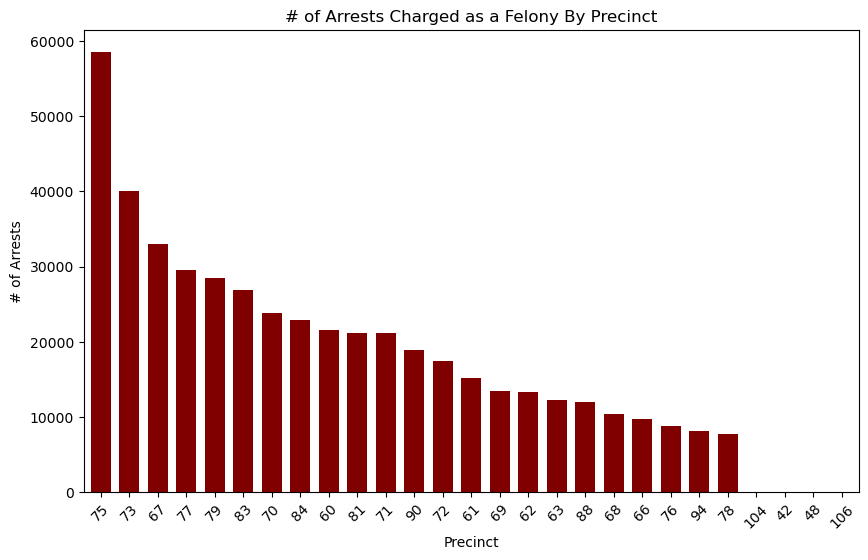

In [137]:
#Visulation for number of arrests charged as felonies for each precinct
df_arrestsbyprecinct.plot(kind='bar',color=['maroon'], figsize=(10, 6), width = 0.70)

plt.title('# of Arrests Charged as a Felony By Precinct')
plt.xlabel('Precinct')
plt.ylabel('# of Arrests')
plt.xticks(rotation=45)
plt.show()

In [175]:
#Count of felonies for each precinct based on gender
felonycount_bygender= df5.groupby(['Precinct','Perp Sex'])['Precinct'].aggregate('count')

In [176]:
felonycount_bygender

Precinct  Perp Sex
42        M               1
48        M               1
60        F            3280
          M           18273
61        F            2152
          M           13071
62        F            1910
          M           11338
63        F            2112
          M           10183
66        F            1270
          M            8497
67        F            5237
          M           27799
68        F            1294
          M            9101
69        F            2236
          M           11255
70        F            3699
          M           20089
71        F            3263
          M           17841
72        F            2353
          M           15097
73        F            6688
          M           33316
75        F           10075
          M           48487
76        F            1457
          M            7393
77        F            4238
          M           25265
78        F            1262
          M            6486
79        F            4487
 

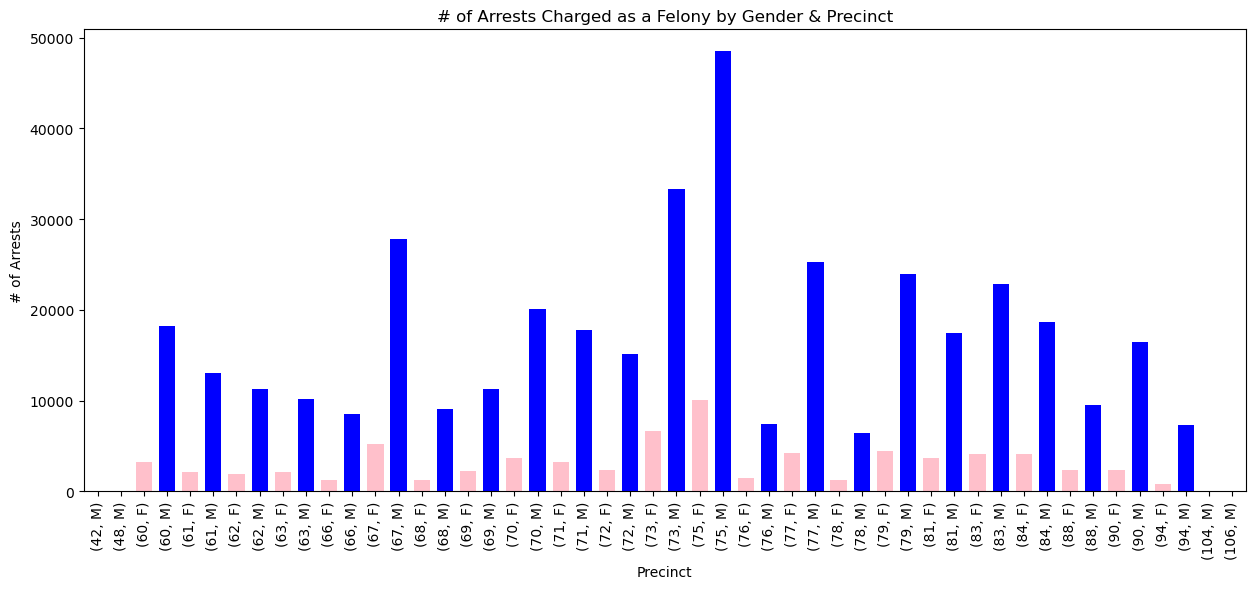

In [183]:
#Visualization of # of arrests between males and females by precinct
felonycount_bygender.plot(kind='bar', figsize=(15, 6), width = 0.70, color=['pink', 'blue'])

plt.xlabel('Precinct')
plt.ylabel('# of Arrests')
plt.title('# of Arrests Charged as a Felony by Gender & Precinct')

plt.show()


Conclusion: Based on the visualizations, the 90th precinct had the 12th highest felony arrests out of all 27 precincts in Brooklyn. The precinct with highest number of felony arrests for both male and female was the 75th precinct. The number of arrests for males was 48,487 and for females was 10,075. The precincts with the lowest mumber of arrests were the 42nd, 48th, 104th, and 106th precincts. 

Bias: There may be a bias in the analysis due to population. Some neighborhoods have a higher number of residents which could lead to a higher number of arrests in the data. 
          